In [23]:
# Dependiences
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


In [24]:
# Specify the path
chromedriver_path = "/usr/local/bin/chromedriver"

In [25]:
# Set up Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument("--headless")

In [26]:
# Start session
service = Service(chromedriver_path)
driver = webdriver.Chrome(service=service, options=chrome_options)


In [27]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
driver.get(url)

In [28]:
# Extract the page source and parse it with BeautifulSoup
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")

In [29]:
# Close Selenium WebDriver
driver.quit()

In [30]:
# Find the table
table = soup.find("table")

In [31]:
# Extract table headers
headers = [header.get_text() for header in table.find_all("th")]

In [32]:
# Extract table rows
rows = []
for row in table.find_all("tr")[1:]:  # Skip the header row
    cells = row.find_all("td")
    row_data = [cell.get_text() for cell in cells]
    rows.append(row_data)


In [33]:
# Convert data into a Pandas DataFrame
df = pd.DataFrame(rows, columns=headers)

In [34]:
# Convert data types
df['id'] = df['id'].astype(int)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [35]:
# Confirm the dataframe creation
print(df.head())

   id terrestrial_date  sol   ls  month  min_temp  pressure
0   2       2012-08-16   10  155      6     -75.0     739.0
1  13       2012-08-17   11  156      6     -76.0     740.0
2  24       2012-08-18   12  156      6     -76.0     741.0
3  35       2012-08-19   13  157      6     -74.0     732.0
4  46       2012-08-20   14  157      6     -74.0     740.0


In [36]:
# Save the data to a CSV file
df.to_csv("weather.csv", index=False)

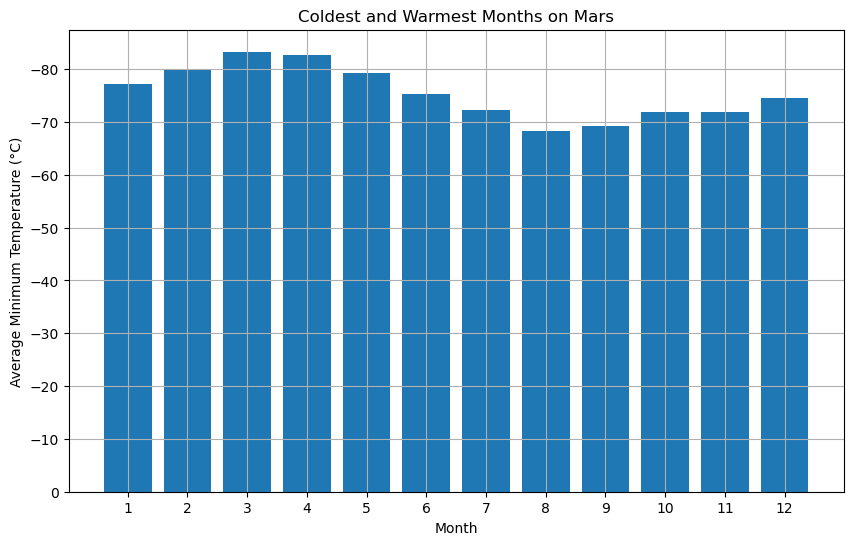

The coldest month is 3, and the warmest month is 8.


In [37]:
# Calculate the average minimum temperature per month
avg_min_temp = df.groupby("month")["min_temp"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(avg_min_temp.index, avg_min_temp.values)
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature (°C)")
plt.title("Coldest and Warmest Months on Mars")
plt.xticks(range(1, 13))
plt.grid(True)

# Flip the Y-axis so colder temperatures appear lower
plt.gca().invert_yaxis()

# Show the plot
plt.show()

# Identify the coldest and warmest months
coldest_month = avg_min_temp.idxmin()
warmest_month = avg_min_temp.idxmax()
print(f"The coldest month is {coldest_month}, and the warmest month is {warmest_month}.")


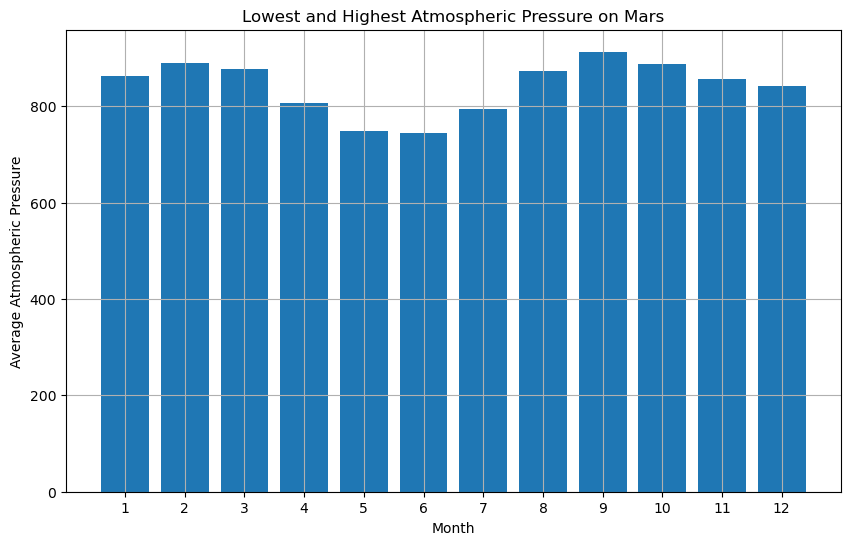

The lowest pressure month is 6, and the highest pressure month is 9.


In [38]:
# Calculate the average atmospheric pressure per month
avg_pressure = df.groupby("month")["pressure"].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(avg_pressure.index, avg_pressure.values)
plt.xlabel("Month")
plt.ylabel("Average Atmospheric Pressure")
plt.title("Lowest and Highest Atmospheric Pressure on Mars")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

# Identify the months with the lowest and highest pressure
lowest_pressure_month = avg_pressure.idxmin()
highest_pressure_month = avg_pressure.idxmax()
print(f"The lowest pressure month is {lowest_pressure_month}, and the highest pressure month is {highest_pressure_month}.")

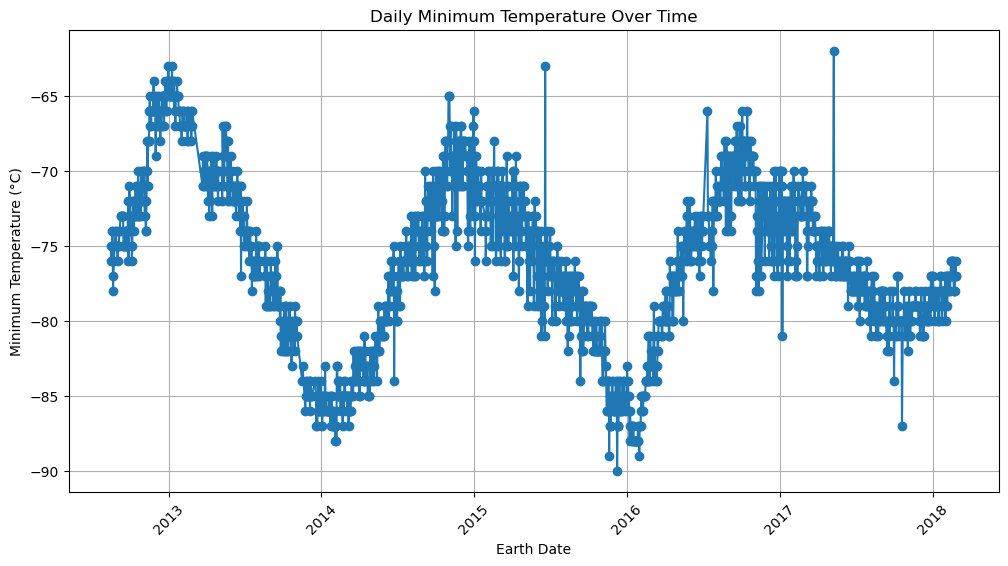

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(df["terrestrial_date"], df["min_temp"], linestyle="-", marker="o")
plt.xlabel("Earth Date")
plt.ylabel("Minimum Temperature (°C)")
plt.title("Daily Minimum Temperature Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Analysis:

Minimum Temperature: The coldest month is 3, and the warmest is 4. Summer likely occurs in months 7-10, while winter spans months 2-5.

Atmospheric Pressure: Peaks in months 9 and 2, with a low in month 6.

Martian Year: Temperature cycles suggest a year slightly shorter than two Earth years.